In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar archivo Excel
file_path = 'laminatesimports.xlsx'

# Lista de hojas (nombres de países)
sheet_names = ['Argentina', 'Brasil', 'Chile', 'Colombia', 'Mexico', 'Peru']

# Cargar el archivo
xls = pd.ExcelFile(file_path)

### Descripción de los Datos

In [3]:
# Función para analizar una hoja
def analizar_hoja(sheet_name):
    print(f"\n📄 Hoja: {sheet_name}")
    df = pd.read_excel(xls, sheet_name=sheet_name, header=5)

    # Mostrar dimensiones
    #print(f"{sheet}: {df.shape}")
    print(f"🔍 Dimensión del dataset: {df.shape[0]} filas, {df.shape[1]} columnas")

    # Análisis por columnas
    resumen = []
    #for col in df.columns:
    #     tipo_dato = df[col].dtype
    #     tipo = 'Numérico' if pd.api.types.is_numeric_dtype(df[col]) else 'Categórico'
    #     n_valores_unicos = df[col].nunique()
    #     valores_unicos = df[col].unique() if n_valores_unicos <= 10 else f"{n_valores_unicos} únicos"
    #     nulos = df[col].isnull().sum()

    #     resumen.append({
    #         "Nombre": col,
    #         "Tipo de dato": tipo_dato,
    #         "Tipo (Cat/Num)": tipo,
    #         "Valores únicos": valores_unicos,
    #         "Valores nulos": nulos
    #     })
    resumen = pd.DataFrame({
        'Tipo de dato': df.dtypes,
       #'Valores únicos': df.nunique(),
        'Valores no nulos': df.count(),
        'Valores nulos': df.isnull().sum()
    })
    resumen['Tipo (Cat/Num)'] = resumen['Tipo de dato'].apply(
        lambda x: 'Numérico' if pd.api.types.is_numeric_dtype(x) else 'Categórico'
    )

    resumen_df = pd.DataFrame(resumen)
    print("\n📌 Resumen de variables:")
    print(resumen_df)
    print("\n" + "="*50)

In [4]:
# Ejecutar análisis por cada hoja
for sheet in sheet_names:
    analizar_hoja(sheet)


📄 Hoja: Argentina
🔍 Dimensión del dataset: 168 filas, 3 columnas

📌 Resumen de variables:
              Tipo de dato  Valores no nulos  Valores nulos Tipo (Cat/Num)
Date        datetime64[ns]               168              0     Categórico
Mid_Value          float64               166              2       Numérico
Mid_Change         float64               166              2       Numérico


📄 Hoja: Brasil
🔍 Dimensión del dataset: 168 filas, 3 columnas

📌 Resumen de variables:
              Tipo de dato  Valores no nulos  Valores nulos Tipo (Cat/Num)
Date        datetime64[ns]               168              0     Categórico
Mid_Value          float64               166              2       Numérico
Mid_Change         float64               166              2       Numérico


📄 Hoja: Chile
🔍 Dimensión del dataset: 168 filas, 3 columnas

📌 Resumen de variables:
              Tipo de dato  Valores no nulos  Valores nulos Tipo (Cat/Num)
Date        datetime64[ns]               168             

### Exploración de los Datos

In [5]:
# Función para realizar la exploración de datos
def exploracion_de_datos(sheet_name):
    print(f"\n📄 Hoja: {sheet_name}")
    df = pd.read_excel(xls, sheet_name=sheet_name, header=5)

    # Dividir las columnas en cualitativas y cuantitativas
    cuantitativas = df.select_dtypes(include=['float64', 'int64'])
    temporales = df.select_dtypes(include=['datetime64[ns]'])

    # Análisis para variables cualitativas
    print("\n Distribución de frecuencias para variables cualitativas:")

    # Medidas estadísticas para variables cuantitativas
    print("\n Medidas estadísticas para variables cuantitativas:")

    if not temporales.empty:
        for col in temporales.columns:
            print(f"\nAnálisis de la variable: {col}")
            print(f"- Media temporal (fecha): {temporales[col].mean()}")
            print(f"- Rango de fechas: {temporales[col].min()} - {temporales[col].max()}")

    if not cuantitativas.empty:
        for col in cuantitativas.columns:
            print(f"\nAnálisis de la variable: {col}")

            # Descripción estadística con describe()
            desc = cuantitativas[col].describe()
            print(desc)

            # Cuartiles y Rango Intercuartílico (IQR)
            Q1 = desc['25%']
            Q3 = desc['75%']
            IQR = Q3 - Q1
            print(f"- Rango intercuartílico (IQR): {IQR}")

            # Outliers
            outliers = cuantitativas[(cuantitativas[col] < (Q1 - 1.5 * IQR)) | (cuantitativas[col] > (Q3 + 1.5 * IQR))]
            print(f"- Outliers detectados: {outliers.shape[0]}")

            #Series de tiempo
            plt.figure(figsize=(10, 4))
            plt.plot(df[temporales.columns[0]], df[col], marker='o')
            plt.title(f"Serie de tiempo de {col}")
            plt.xlabel("Fecha")
            plt.ylabel(col)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.grid(True)
            plt.show()

            # Boxplot
            print("\n")
            plt.figure(figsize=(6, 4))
            sns.boxplot(x=cuantitativas[col])
            plt.title(f"Boxplot de {col}")
            plt.show()

            # Histograma para distribución de datos
            plt.figure(figsize=(6, 4))
            sns.histplot(cuantitativas[col], kde=True, bins=20)
            plt.title(f"Histograma de {col}")
            plt.show()

    # Análisis de correlación (Mapa de calor)
    print("\n Análisis de correlación de las variables cuantitativas:")
    if not cuantitativas.empty and cuantitativas.shape[1] > 1:
        corr_matrix = cuantitativas.corr()
        plt.figure(figsize=(4, 3))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title("Mapa de calor de la correlación entre variables cuantitativas")
        plt.show()

    print("\n" + "="*40)


📄 Hoja: Argentina

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    166.000000
mean      70.210352
std       22.287399
min       26.753708
25%       54.240219
50%       70.402879
75%       83.127397
max      159.133092
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 28.887177950508914
- Outliers detectados: 3


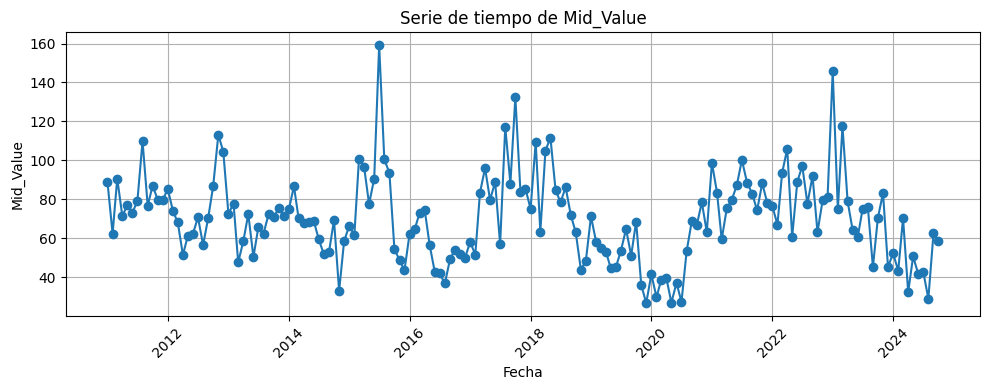

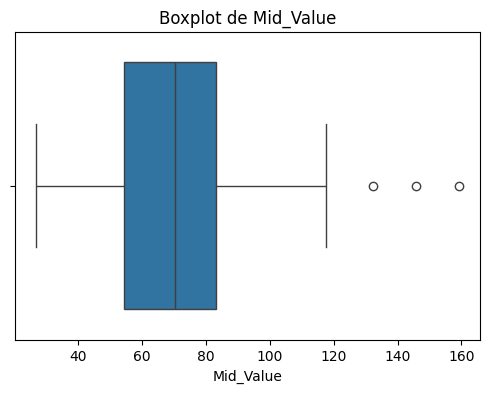

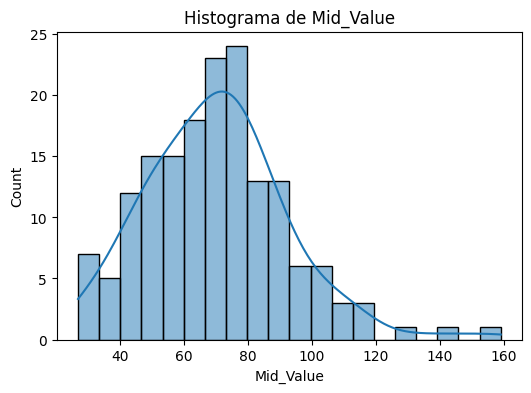


Análisis de la variable: Mid_Change
count    166.000000
mean       4.179244
std       31.374299
min      -53.981508
25%      -16.989185
50%        0.249505
75%       18.412229
max      115.431546
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 35.4014132923977
- Outliers detectados: 6


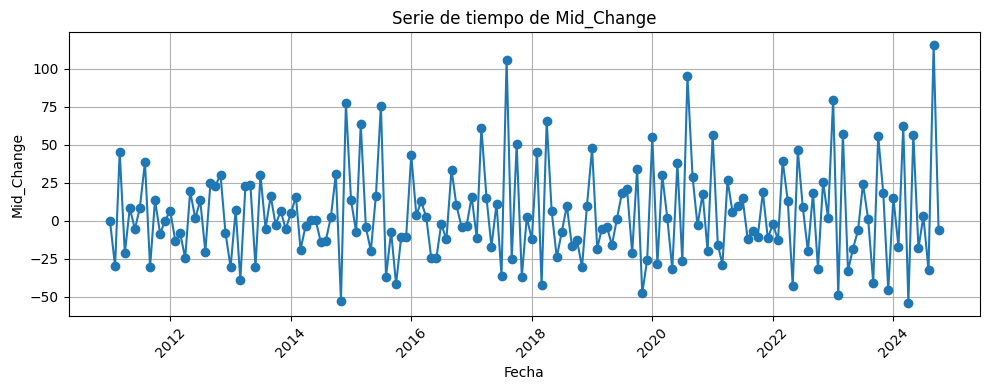

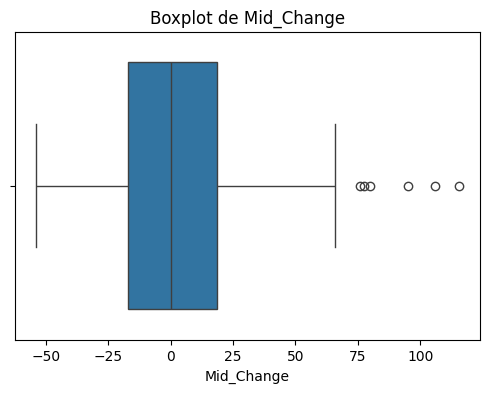

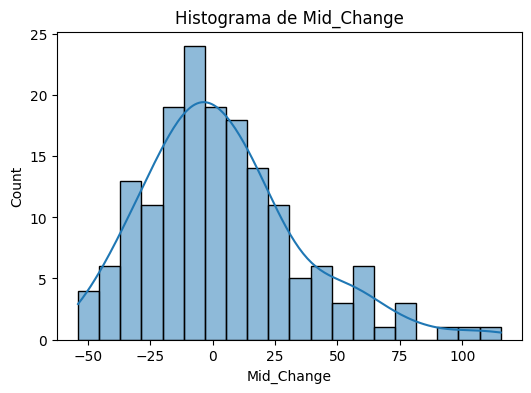


 Análisis de correlación de las variables cuantitativas:


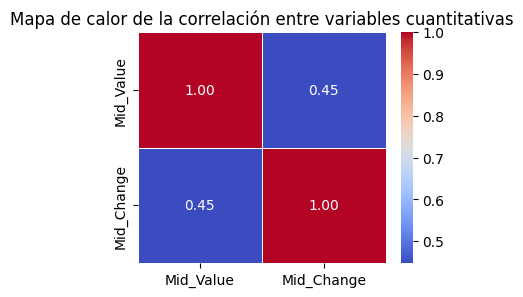



📄 Hoja: Brasil

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    166.000000
mean     245.593470
std       90.559115
min       70.357000
25%      169.102750
50%      261.200000
75%      309.070250
max      475.575000
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 139.96749999999997
- Outliers detectados: 0


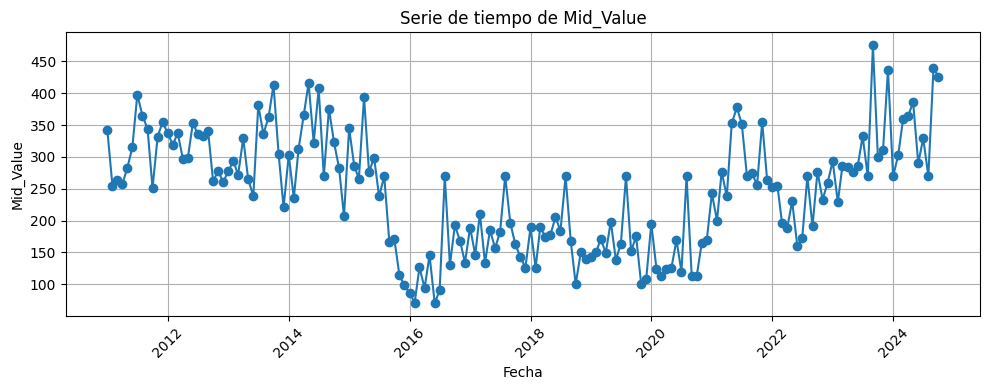

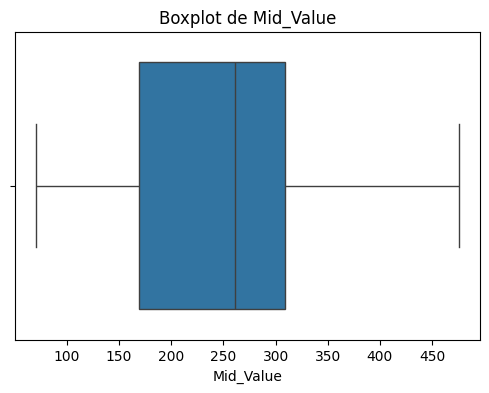

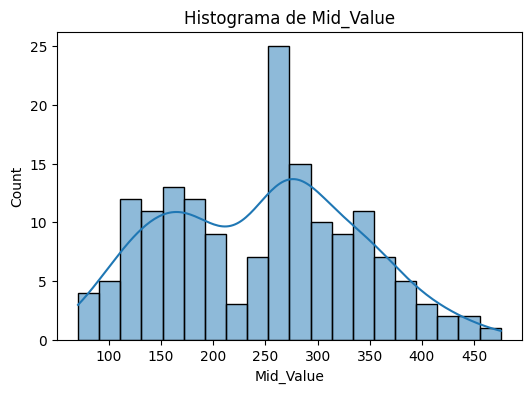


Análisis de la variable: Mid_Change
count    166.000000
mean       4.876855
std       33.866790
min      -57.996231
25%      -17.597634
50%        0.175216
75%       18.632515
max      199.276103
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 36.23014954070926
- Outliers detectados: 5


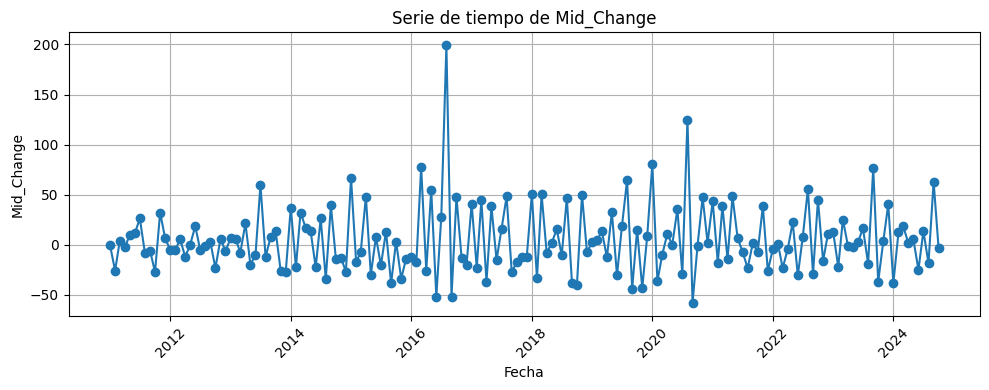

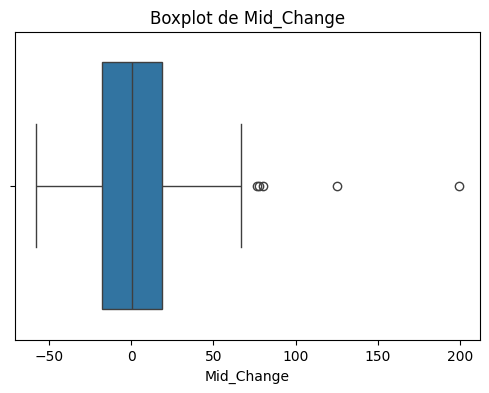

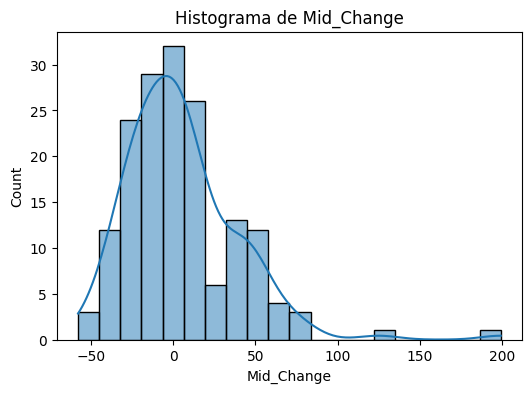


 Análisis de correlación de las variables cuantitativas:


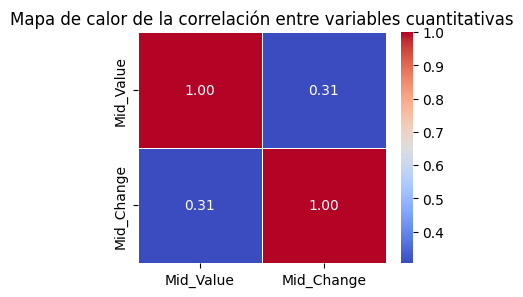



📄 Hoja: Chile

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    166.000000
mean     142.754529
std       41.207946
min       52.563000
25%      113.138347
50%      140.018324
75%      165.631181
max      292.065910
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 52.49283395645837
- Outliers detectados: 3


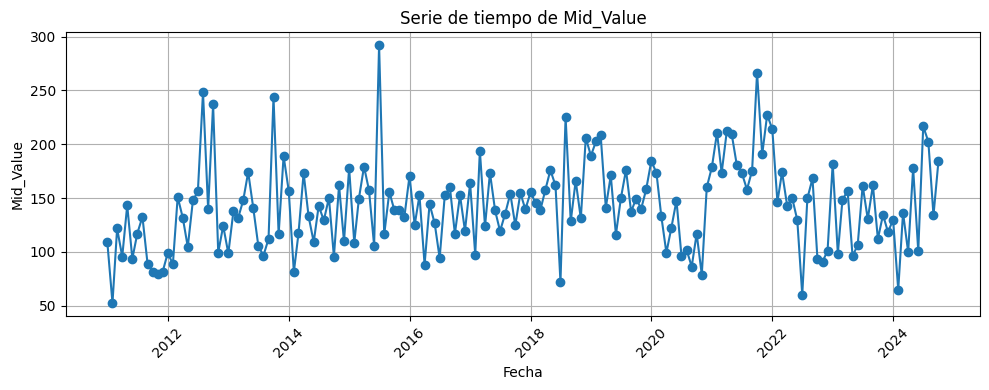

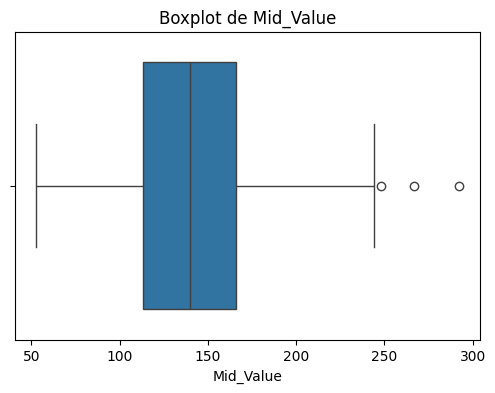

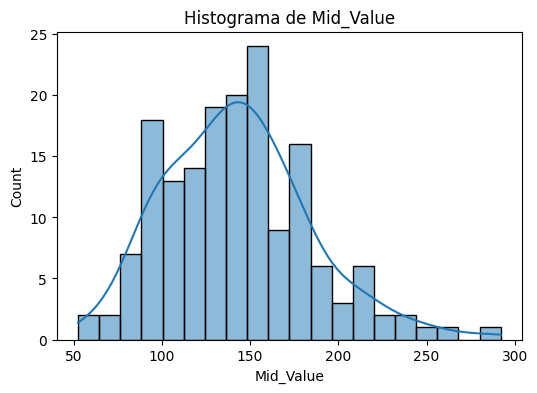


Análisis de la variable: Mid_Change
count    166.000000
mean       8.000046
std       44.263113
min      -60.180755
25%      -21.356891
50%        0.159479
75%       24.148903
max      212.833696
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 45.50579375835568
- Outliers detectados: 9


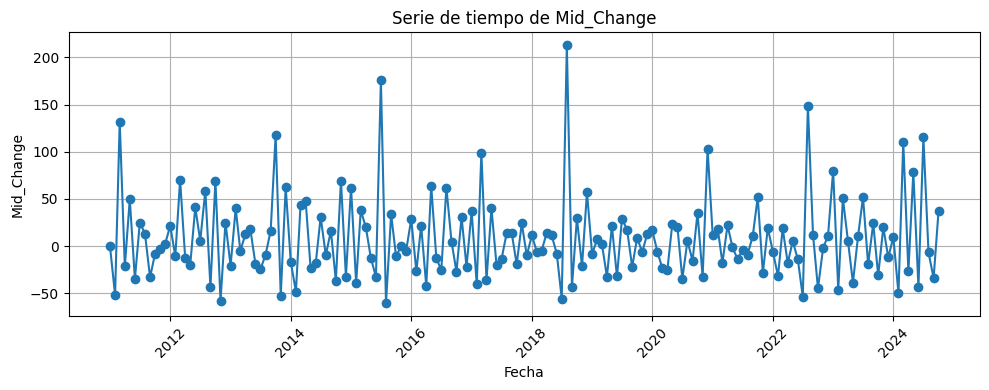

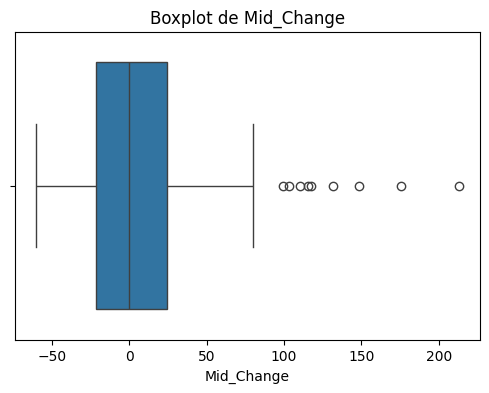

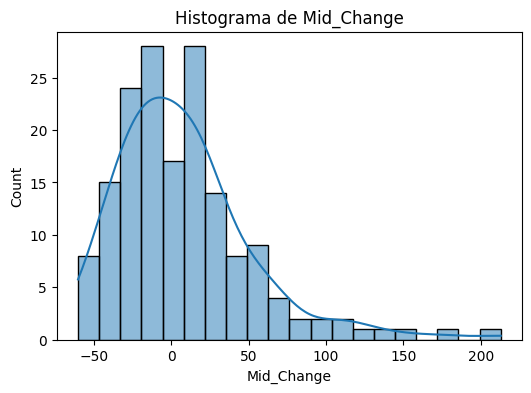


 Análisis de correlación de las variables cuantitativas:


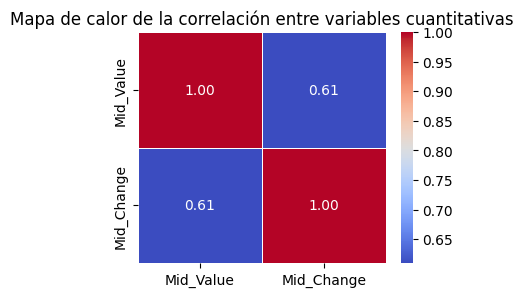



📄 Hoja: Colombia

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    166.000000
mean     183.446959
std       45.627970
min       59.771000
25%      156.577234
50%      183.996012
75%      215.033586
max      361.110116
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 58.45635183250002
- Outliers detectados: 3


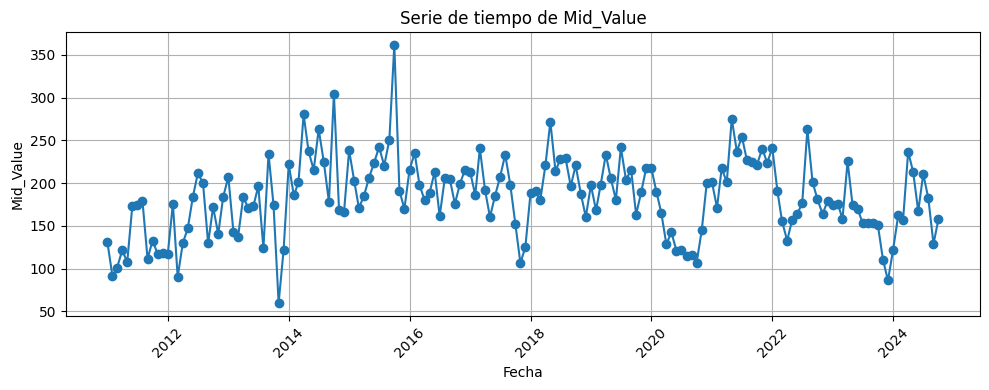

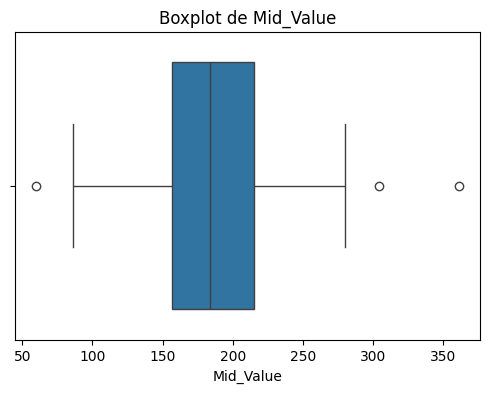

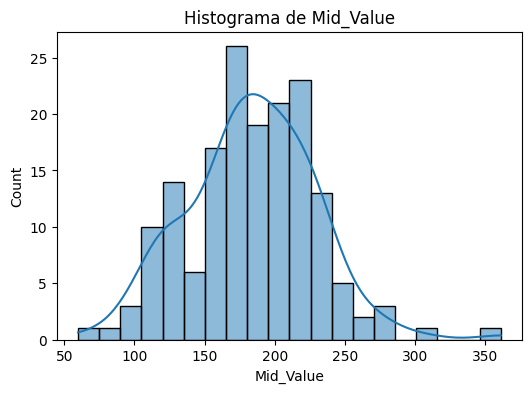


Análisis de la variable: Mid_Change
count    166.000000
mean       3.194083
std       25.714632
min      -65.790212
25%      -14.388604
50%       -0.000449
75%       15.490876
max      103.540178
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 29.87947956477862
- Outliers detectados: 6


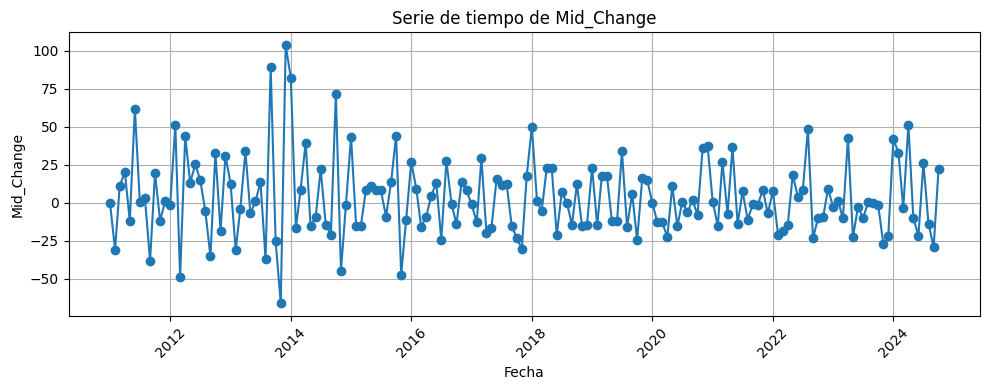

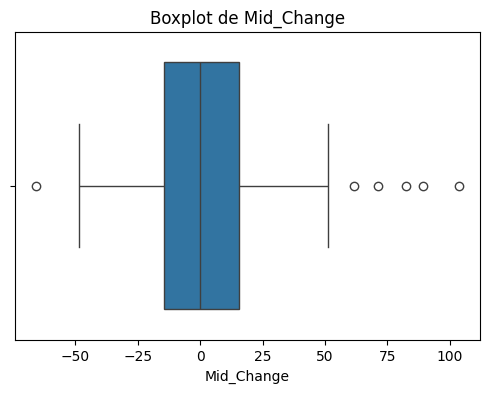

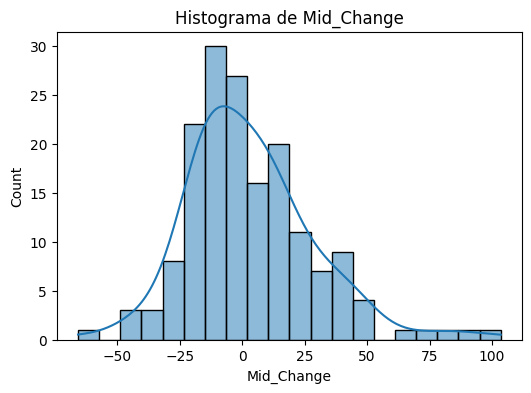


 Análisis de correlación de las variables cuantitativas:


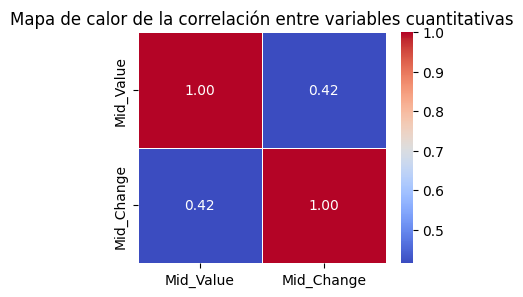



📄 Hoja: Mexico

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count     166.000000
mean      837.427720
std       155.180215
min       499.483848
25%       735.710537
50%       829.179328
75%       927.473245
max      1255.154234
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 191.76270793458764
- Outliers detectados: 2


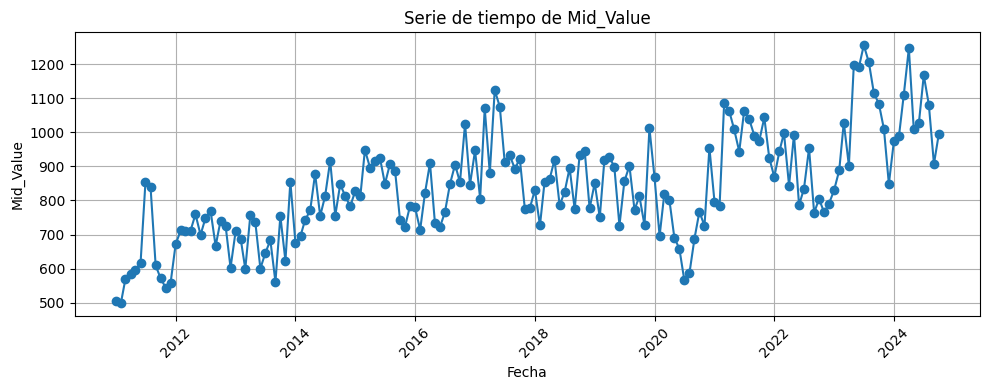

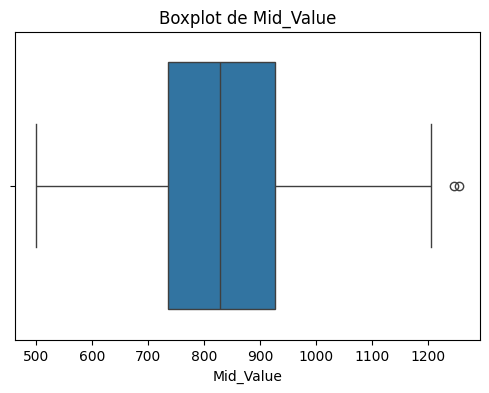

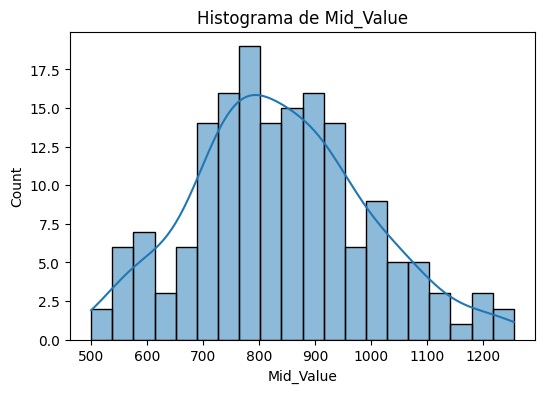


Análisis de la variable: Mid_Change
count    166.000000
mean       1.305532
std       13.690176
min      -27.242941
25%       -7.531428
50%        1.031926
75%        8.565748
max       39.140751
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 16.097175613659633
- Outliers detectados: 6


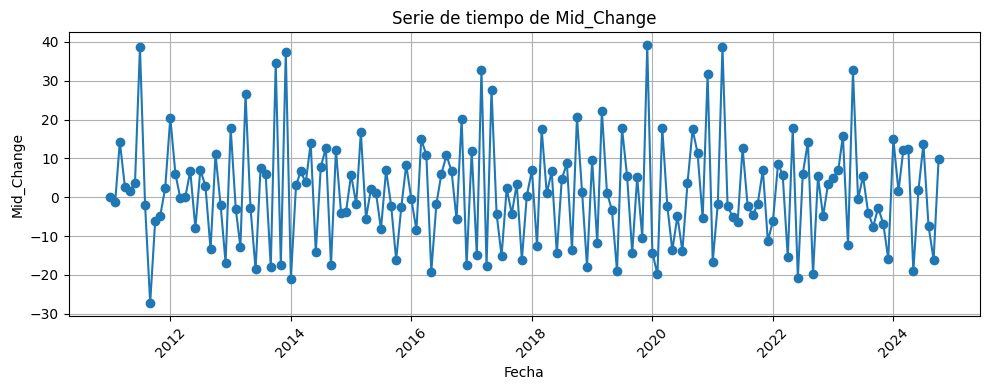

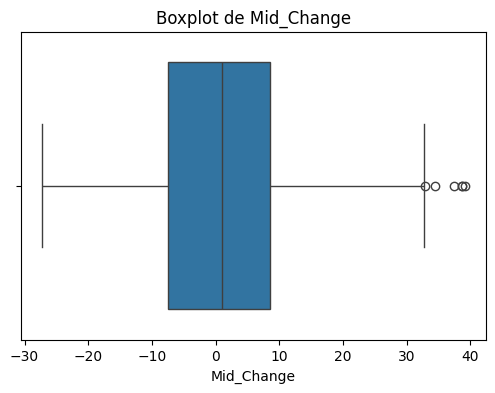

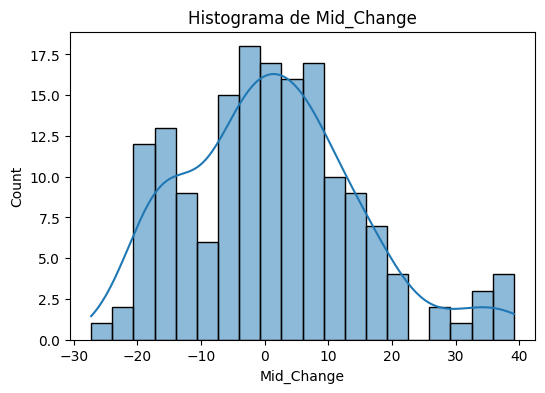


 Análisis de correlación de las variables cuantitativas:


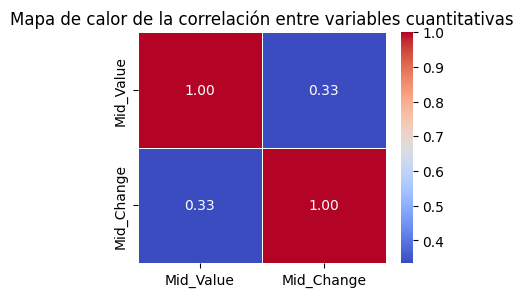



📄 Hoja: Peru

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    166.000000
mean     152.781466
std       55.833895
min       67.502491
25%      121.418417
50%      144.904651
75%      177.318195
max      594.420719
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 55.89977710399984
- Outliers detectados: 3


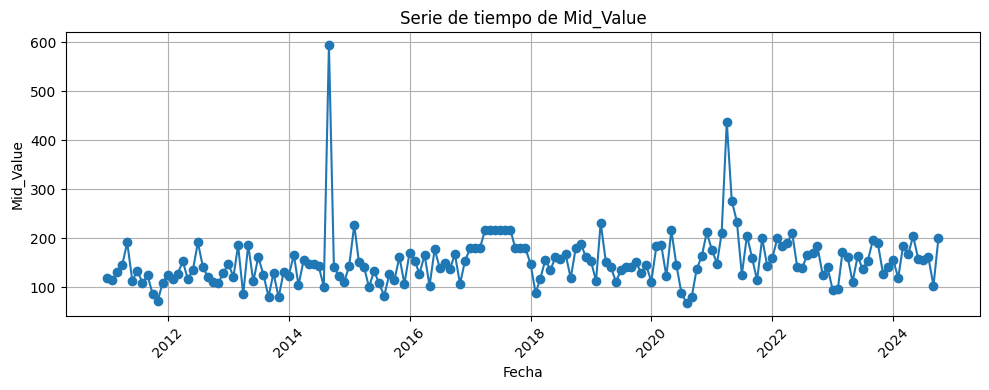

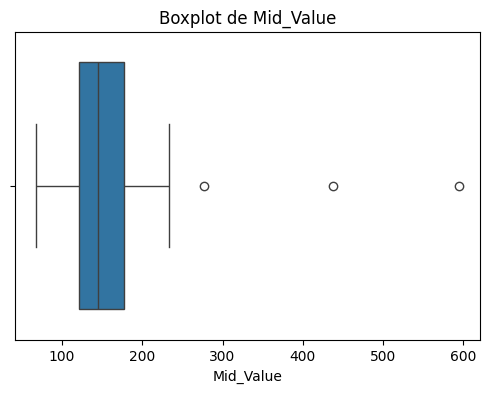

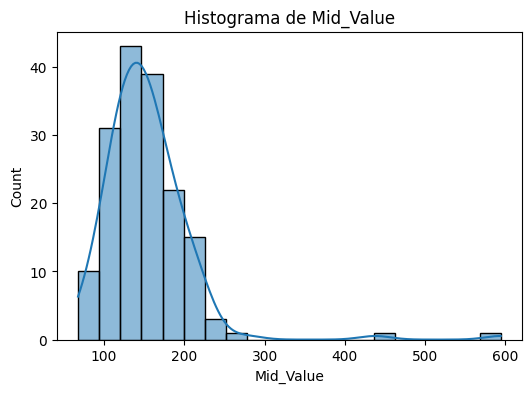


Análisis de la variable: Mid_Change
count    166.000000
mean       7.499354
std       50.798661
min      -76.284927
25%      -20.958017
50%        0.000000
75%       20.456100
max      487.834635
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 41.414116928195355
- Outliers detectados: 5


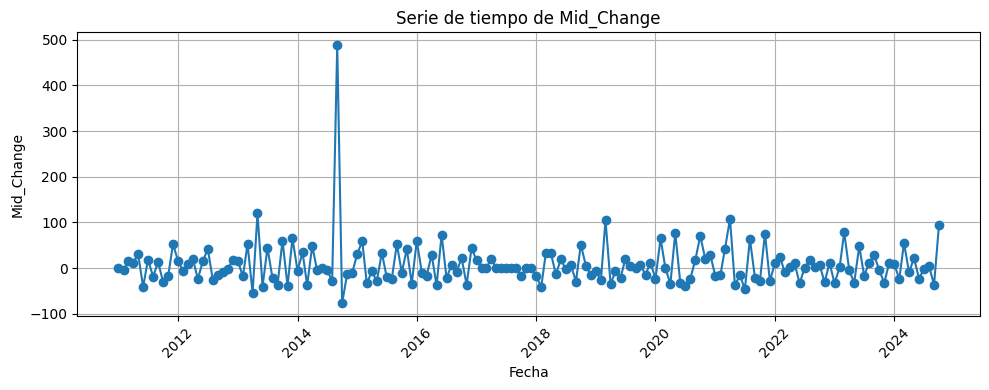

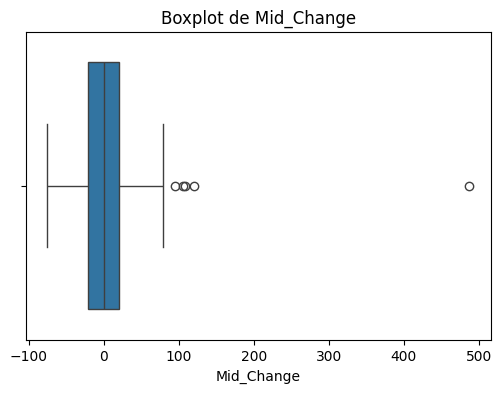

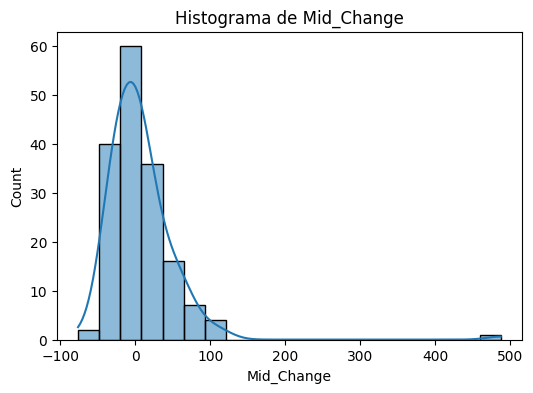


 Análisis de correlación de las variables cuantitativas:


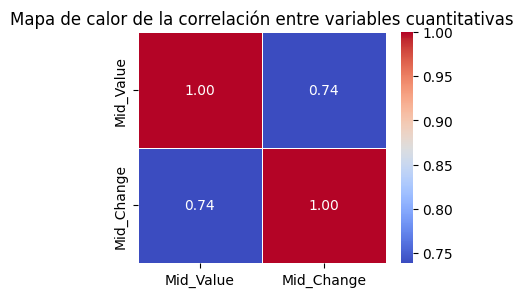

In [6]:
# Ejecutar el análisis para cada hoja
for sheet in sheet_names:
    exploracion_de_datos(sheet)